## Introduction

### Objective
The primary objective of this analysis is to examine the historical performance of Chester, Inc., as well as its market competitors. Through a comprehensive examination of various datasets, we aim to extract actionable insights that could pave the way for strategic decisions and future growth.

---

### Scope
The analysis covers multiple facets of business performance, including but not limited to:
- Sales and Revenue Trends
- Market Share Analysis
- Human Resource Metrics
- Financial Ratios and Health

---

### Methodology
We'll employ Python's data manipulation and visualization libraries—Pandas, Matplotlib, and Seaborn—to perform this analysis. The study is organized into five phases:
1. **Data Preparation**: Importing libraries and loading datasets.
2. **Exploratory Data Analysis (EDA)**: Summary statistics and correlation analysis.
3. **Data Visualization**: Creating insightful charts and graphs.
4. **Insights and Recommendations**: Drawing conclusions and suggesting actionable steps.
5. **Conclusion**: Summarizing the key takeaways.

---

### Importance
The insights derived from this analysis will not only provide a snapshot of the company's current state but also shape its future direction. This is critical for stakeholders in making informed decisions.


## Phase 1:  Data Preparation

### Step 1: Import libraries

First, we'll import the Python libraries that will be needed for data manipulation and visualization.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

### Step 2: Load the Data

Next, we will load the data from the Excel file into Python.

In [2]:
# Read the Excel file data into a dictionary of dataframes
excel_file = '../../data/raw/CompetitionRoundsData.xlsx'
sheets_dict = pd.read_excel(excel_file, sheet_name=None)

### Step 3: Data Review

Now we will utilize various Pandas methods and functions to familiarize ourselves with the data.

First let's see what data is available:

In [3]:
# Get the list of worksheet names
worksheet_names = list(sheets_dict.keys())

# Display the worksheet names in a user-friendly manner
print('Available Worksheets:')
for index, sheet in enumerate(worksheet_names):
    print(f'{index+1}. {sheet}')

Available Worksheets:
1. Years
2. Forecast
3. selectedFinancials
4. Stocks
5. Bonds
6. Financial
7. ProductInfo
8. Size Stats
9. Customer Criteria
10. ProductBySegment
11. MarketShare
12. actualMarketShareUnits
13. potentialMarketShareUnits
14. actualMarketSharePercent
15. potentialMarketSharePercent
16. HR
17. TQM
18. Ethics
19. officialDecMrkt
20. officialDecPrd
21. officialDecHR
22. officialDecFin


Wow, that is a lot of data!

Let's review further with a systematic approach:
1. Check for Missing Values, Number of Numeric/Categorical Columns
2. Data Shape/Types
3. Summary Statistics
4. View Sample Rows
5. Drop Unwanted Sheets

#### Step 3.1: Basic Info

We'll start by looping through the dictionary and print out basic information for each DataFrame:

In [4]:
# Initialize an empty DataFrame to store summary
summary_df = pd.DataFrame(columns=['Sheet Name', 'Missing Values', 'Numeric Cols', 'Categorical Cols'])

# Initialize an index counter
index_counter = 0

# Iterate through sheets_dict to populate summary_df
for name, df in sheets_dict.items():
    missing_values = df.isnull().sum().sum() | df.isna().sum().sum()
    numeric_cols = len(df.select_dtypes(include=['number']).columns)
    categorical_cols = len(df.select_dtypes(include=['object']).columns)

    summary_df.loc[index_counter] = [name, missing_values, numeric_cols, categorical_cols]
    index_counter += 1

# Set the index of summary_df to Sheet Name for better readability
summary_df.set_index('Sheet Name', inplace=True)

# Display the summary DataFrame
print(summary_df)

                             Missing Values  Numeric Cols  Categorical Cols
Sheet Name                                                                 
Years                                     0             1                 2
Forecast                                  0            13                 2
selectedFinancials                        0            13                 1
Stocks                                    0            10                 1
Bonds                                     0             4                 3
Financial                                 0            47                 1
ProductInfo                               0            15                 3
Size Stats                                0             5                 2
Customer Criteria                         0             3                 4
ProductBySegment                        158            13                 4
MarketShare                            1904            13                 2
actualMarket

#### Step 3.2: Data Shape/Types

In [5]:
# Used .info() to get a concise summary of each DataFrame
for name, df in sheets_dict.items():
    print(f"Sheet Name: {name}")
    print(f"Info:")
    print(f"{df.info()}")
    print("-"*50)

Sheet Name: Years
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   round        9 non-null      int64         
 1   yearEnding   9 non-null      datetime64[ns]
 2   companyName  9 non-null      object        
 3   companyID    9 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 420.0+ bytes
None
--------------------------------------------------
Sheet Name: Forecast
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Round                                                                            20 non-null     

#### Step 3.3: Summary Statistics

In [6]:
# Utilize the describe() method to get a statistical summary of each DataFrame
for name, df in sheets_dict.items():
    print(f"Sheet Name: {name}")
    print(f"Statistical Summary:")
    print(f"{df.describe()}")
    print("-"*50)

Sheet Name: Years
Statistical Summary:
          round           yearEnding
count  9.000000                    9
mean   4.000000  2027-12-31 08:00:00
min    0.000000  2023-12-31 00:00:00
25%    2.000000  2025-12-31 00:00:00
50%    4.000000  2027-12-31 00:00:00
75%    6.000000  2029-12-31 00:00:00
max    8.000000  2031-12-31 00:00:00
std    2.738613                  NaN
--------------------------------------------------
Sheet Name: Forecast
Statistical Summary:
           Round  Total Industry Unit Demand  Next Year's Segment Growth Rate  \
count  20.000000                   20.000000                        20.000000   
mean    1.500000                 5362.650000                         0.150400   
std     1.147079                 3544.408885                         0.041011   
min     0.000000                 1915.000000                         0.092000   
25%     0.750000                 2554.000000                         0.117000   
50%     1.500000                 3370.500000     

Here are my observations:

- ~~Years: 9 rows, 4 cols, no missing values, 1 numeric col, 2 cat cols....~~ NOT using for analysis
- ~~Forecast: 20 rows, 15 cols, no missing values, 13 numeric cols, 2 cat cols....~~ NOT using for analysis
- selectedFinancials: 54 rows, 15 cols, no missing values, 13 numeric cols, 1 cat col....*interested in using*
    - ROS, ROA, ROE, Sales, EBIT, Profits, cumulativeProfits, SG&A/Sales, contribMarginPercent
- Stocks: 54 rows, 12 cols, no missing values, 10 numeric cols, 1 cat col....*interested in using*
    - Close, Change, EPS
- ~~Bonds: 131 rows, 8 cols, 4 numberic cols, 3 cat cols...~~ NOT using for analysis
- Financial: 54 rows, 49 cols, no missing values, 47 numeric cols, 1 cat col....*interested in using*
    - Net Income (Loss), Net cash from operations, Plant improvements (net), Net cash from financing activities, Net change in cash position, Cash, Accounts Receivable, Inventory, Total Current Assets, Total Fixed Assets, Total Assets, Accounts Payable, Total Current Liabilities, Total Liabilities, Total Equity, Total Liabilities & Owners' Equity, Sales, Variable Costs (Labor, Material, Carry), Contribution Margin, SGA (R&D, Promo, Sales, Admin), Other (Fees, writeoffs, TQM, Bonuses), EBIT, Interest (Short term, Long term), Taxes, Profit Sharing, Net Proft
- ProductInfo: 284 rows, 20 cols, no missing values, 15 numeric cols, 3 cat cols...*interested in using*
    - product, segment, unitsSold, Inventory, ageDec31, mtbf, pfmn, size, price, materialCost, laborCost, contrMargin, automationNR,  plantUtiliz
- Size Stats: 45 rows, 8 cols, no missing values, 5 numeric cols, 2 cat cols....*interested in using*
    - Total Industry Unit Demand, Actual Industry Unit Sales, Segment % of Total Industry, Next Year's Segment Growth Rate
- Customer Criteria: 180 rows, 8 cols, no missing values, 3 numeric cols, 4 cat cols....*interested in using*
    - criteria, Expectations (need to delete redundant text and split into low/high and Pfmn/Size), Importance
- ProductBySegment: 332 rows, 19 cols, 158 missing values in stockOut col, 13 numeric cols, 4 cat cols....*interested in using*
    - marketShare, stockOut~~(fill missing values with 0)~~, promoBudget, custAwareness, salesBudget, custaccessibility, custSurveyDec
- ~~MarketShare: 306 rows, 16 cols, 1904 missing values, 13 numeric cols, 2 cat cols....~~ NOT using for analysis
- actualMarketShareUnits: 9 rows, 9 cols, no missing values, 7 numeric cols, 1 cat col....*interested in using*
    - Industry Unit Sales for Trad Seg, Industry Unit Sales for Low Seg, Industry Unit Sales for High Seg, Industry Unit Sales for Pfmn Seg, Industry Unit Sales for Size Seg
- potentialMarketShareUnits: 9 rows, 9 cols, no missing values, 7 numeric cols, 1 cat col....*interested in using*
    - Units Demanded for Trad Seg, Units Demanded for Low Seg, Units Demanded for High Seg, Units Demanded for Pfmn Seg, Units Demanded for Size Seg
- actualMarketSharePercent: 9 rows, 9 cols, no missing values, 7 numeric cols, 1 cat col....*interested in using*
    - Actual % of Market for Trad Seg, Actual % of Market for Low Seg, Actual % of Market for High Seg, Actual % of Market for Pfmn Seg, Actual % of Market for Size Seg
- potentialMarketSharepercent: 9 rows, 9 cols, no missing values, 7 numeric cols, 1 cat col....*interested in using*
    - Potential % of Market for Trad Seg, Potential % of Market for Low Seg, Potential % of Market for High Seg, Potential % of Market for Pfmn Seg, Potential % of Market for Size Seg
- HR: 54 rows, 23 cols, no missing values, 20 numeric cols, 2 cat cols....*interested in using*
    - Overtime%, Turnover Rate, New Employees, Productivity Index, Recruiting Cost, Separation Cost, Training Cost, Total HR Admin Cost, Wages, Annual Raise
- TQM: 54 rows, 19 cols, no missing values, 17 numeric cols, 1 cat col....*interested in using*
    - Total Expenditures, Material Cost Reduction, Labor Cost Reduction, Reduction R&D Cycle Time, Reduction Admin Costs, Demand Increase
- ~~Ethics: 63 rows, 10 cols, no missing values, 8 numeric cols, 1 cat col....~~ NOT using for analysis
- officialDecMrkt: 45 rows, 16 cols, no missing values, 11 numeric cols, 4 cat cols....*interested in using*
    - MKTGDirectMail, MKTGDistributors, MKTGEmail, MKTGInsideSales, MKTGOutsideSales, MKTGPrintMedia, MKTGReports, MKTGTradeShows, MKTGWebMedia
- ~~officialDecPrd: 56 rows, 15 cols, no missing values, 11 numeric cols, 3 cat cols....~~ NOT using for analysis
- ~~officialDecHR: 14 rows, 6 cols, no missing values, 4 numeric cols, 1 cat col....~~ NOT using for analysis
- ~~officialDecFin: 8 rows, 12 cols, no missing values, 9 numeric cols, 2 cat cols....~~ NOT using for analysis

#### Step 3.4: Peek into Data

Taking a peek into the actual data by utilizing the sample() method and confirming agreement with existing observations.


In [7]:
# Display a data sampling of each DataFrame
for name, df in sheets_dict.items():
    print(f"Sheet Name: {name}")
    print(f"Data Sample:")
    print(f"{df.head()}")
    print("-"*50)

Sheet Name: Years
Data Sample:
   round yearEnding companyName companyID
0      0 2023-12-31     Chester   C142507
1      1 2024-12-31     Chester   C142507
2      2 2025-12-31     Chester   C142507
3      3 2026-12-31     Chester   C142507
4      4 2027-12-31     Chester   C142507
--------------------------------------------------
Sheet Name: Forecast
Data Sample:
   Round Segment  Company  Total Industry Unit Demand  \
0      3    Trad  Chester                        9619   
1      3     Low  Chester                       12488   
2      3    High  Chester                        4007   
3      3    Perf  Chester                        3293   
4      3    Size  Chester                        3284   

   Next Year's Segment Growth Rate  Next Year's Segment Demand  \
0                            0.092                     884.948   
1                            0.117                    1461.096   
2                            0.162                     649.134   
3                        

#### Step 3.5: Drop Unwanted Sheets

In [8]:
# Drop specific sheets (rows in this DataFrame) that are not the focus of this analysis
sheets_to_drop = ['Years', 'Forecast', 'Bonds', 'MarketShare', 'Ethics', 'officialDecPrd', 'officialDecHR', 'officialDecFin']

# Dropping the rows
summary_df.drop(sheets_to_drop, inplace=True)

# Displaying the updated summary DataFrame
print("\nUpdated summary DataFrame after dropping specific sheets:")
print(summary_df)


Updated summary DataFrame after dropping specific sheets:
                             Missing Values  Numeric Cols  Categorical Cols
Sheet Name                                                                 
selectedFinancials                        0            13                 1
Stocks                                    0            10                 1
Financial                                 0            47                 1
ProductInfo                               0            15                 3
Size Stats                                0             5                 2
Customer Criteria                         0             3                 4
ProductBySegment                        158            13                 4
actualMarketShareUnits                    0             7                 1
potentialMarketShareUnits                 0             7                 1
actualMarketSharePercent                  0             7                 1
potentialMarketSharePercent  

### Step 4: Data Cleaning

#### Step 4.1 Handle Missing Values

In [9]:
# Access the DataFrame from sheets_dict
product_by_segment_df = sheets_dict['ProductBySegment']

# Fill NaN values in the 'stockOut' column with 0
product_by_segment_df['stockOut'].fillna(0, inplace=True)

# Confirm no missing values in the product_by_segment_df DataFrame
print(f"Missing values in product_by_segment_df: {product_by_segment_df.isnull().sum().sum() | product_by_segment_df.isna().sum().sum()}")


Missing values in product_by_segment_df: 0


In [10]:
# Update the DataFrame in sheets_dict
sheets_dict["ProductBySegment"] = product_by_segment_df

# Update the 'Missing Values' count for 'ProductBySegment' in summary_df
summary_df.loc["ProductBySegment", "Missing Values"] = 0

# Displaying the updated summary DataFrame
print(
    "\nUpdated summary DataFrame after updating 'Missing Value' count for 'ProductBySegment':"
)
print(summary_df)


Updated summary DataFrame after updating 'Missing Value' count for 'ProductBySegment':
                             Missing Values  Numeric Cols  Categorical Cols
Sheet Name                                                                 
selectedFinancials                        0            13                 1
Stocks                                    0            10                 1
Financial                                 0            47                 1
ProductInfo                               0            15                 3
Size Stats                                0             5                 2
Customer Criteria                         0             3                 4
ProductBySegment                          0            13                 4
actualMarketShareUnits                    0             7                 1
potentialMarketShareUnits                 0             7                 1
actualMarketSharePercent                  0             7                 1


#### Step 4.2 Splitting Columns/Deleting Redundant Text

In [11]:
# Create dataframe for 'Customer Criteria' sheet
customer_criteria_df = sheets_dict['Customer Criteria']

# Display the first 5 rows of customer_criteria_df
print(customer_criteria_df.head())

   round yearEnding segment  Company  priority        criteria  \
0      0 2023-12-31    Trad  Chester         1             Age   
1      0 2023-12-31    Trad  Chester         2           Price   
2      0 2023-12-31    Trad  Chester         3  Ideal Position   
3      0 2023-12-31    Trad  Chester         4     Reliability   
4      0 2023-12-31     Low  Chester         1           Price   

         Expectations  Importance  
0     Ideal Age = 2.0        0.47  
1      $20.00 - 30.00        0.23  
2  Pfmn 5.0 Size 15.0        0.21  
3    MTBF 14000-19000        0.09  
4      $15.00 - 25.00        0.53  


In [12]:
# Extract 'Ideal Age'
customer_criteria_df["Ideal Age"] = (
    customer_criteria_df["Expectations"]
    .str.extract("Ideal Age = ([\\d.]+)")
    .astype(float)
)

# Extract 'Pfmn'
customer_criteria_df["Pfmn"] = (
    customer_criteria_df["Expectations"].str.extract("Pfmn ([\\d.]+)").astype(float)
)

# Extract 'Size'
customer_criteria_df["Size"] = (
    customer_criteria_df["Expectations"].str.extract("Size ([\\d.]+)").astype(float)
)

# Extract 'Low Price'
customer_criteria_df["Low Price"] = (
    customer_criteria_df["Expectations"].str.extract("\\$([\\d\\d.]+) ").astype(float)
)

# Extract 'High Price'
customer_criteria_df["High Price"] = (
    customer_criteria_df["Expectations"].str.extract("- ([\\d.]+)").astype(float)
)

# Extract 'MTBF Low'
customer_criteria_df["MTBF Low"] = (
    customer_criteria_df["Expectations"].str.extract("MTBF ([\\d.]+)").astype(float)
)

# Extract 'MTBF High'
customer_criteria_df["MTBF High"] = (
    customer_criteria_df["Expectations"].str.extract("-([\\d.]+)").astype(float)
)

# Drop the 'Expectations' column
customer_criteria_df.drop("Expectations", axis=1, inplace=True)

# Display the updated DataFrame
print(customer_criteria_df.head())

   round yearEnding segment  Company  priority        criteria  Importance  \
0      0 2023-12-31    Trad  Chester         1             Age        0.47   
1      0 2023-12-31    Trad  Chester         2           Price        0.23   
2      0 2023-12-31    Trad  Chester         3  Ideal Position        0.21   
3      0 2023-12-31    Trad  Chester         4     Reliability        0.09   
4      0 2023-12-31     Low  Chester         1           Price        0.53   

   Ideal Age  Pfmn  Size  Low Price  High Price  MTBF Low  MTBF High  
0        2.0   NaN   NaN        NaN         NaN       NaN        NaN  
1        NaN   NaN   NaN       20.0        30.0       NaN        NaN  
2        NaN   5.0  15.0        NaN         NaN       NaN        NaN  
3        NaN   NaN   NaN        NaN         NaN   14000.0    19000.0  
4        NaN   NaN   NaN       15.0        25.0       NaN        NaN  


In [13]:
# Replace values in 'criteria' column
customer_criteria_df['criteria'].replace({
    'Age': 'Ideal Age',
    'Reliability': 'Reliability (MTBF)'
}, inplace=True)

# Display the updated DataFrame
print(customer_criteria_df.head())

   round yearEnding segment  Company  priority            criteria  \
0      0 2023-12-31    Trad  Chester         1           Ideal Age   
1      0 2023-12-31    Trad  Chester         2               Price   
2      0 2023-12-31    Trad  Chester         3      Ideal Position   
3      0 2023-12-31    Trad  Chester         4  Reliability (MTBF)   
4      0 2023-12-31     Low  Chester         1               Price   

   Importance  Ideal Age  Pfmn  Size  Low Price  High Price  MTBF Low  \
0        0.47        2.0   NaN   NaN        NaN         NaN       NaN   
1        0.23        NaN   NaN   NaN       20.0        30.0       NaN   
2        0.21        NaN   5.0  15.0        NaN         NaN       NaN   
3        0.09        NaN   NaN   NaN        NaN         NaN   14000.0   
4        0.53        NaN   NaN   NaN       15.0        25.0       NaN   

   MTBF High  
0        NaN  
1        NaN  
2        NaN  
3    19000.0  
4        NaN  


In [14]:
# Export the updated DataFrame to a CSV file
customer_criteria_df.to_csv('../../data/processed/customer_criteria.csv', index=False)

## Phase 2:  Exploratory Data Analysis (EDA)

### Step 2.1: Customer Criteria Analysis

#### Step 2.1.1: Importance of Criteria within each Segment

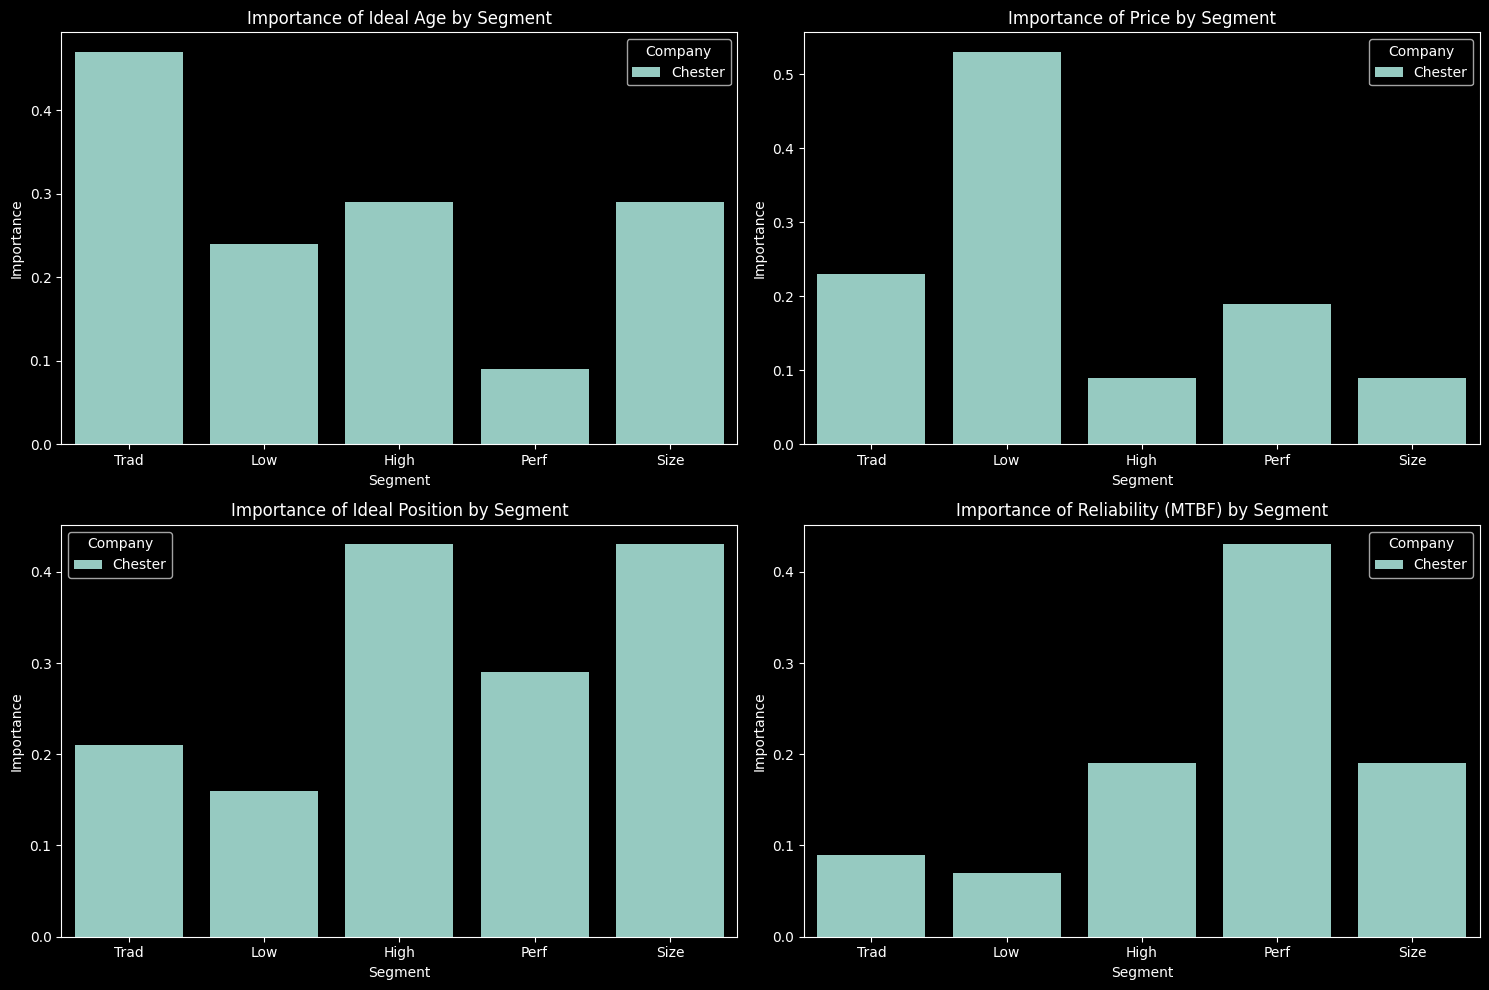

In [26]:
# Filtering the data for different criteria
criteria_types = ["Ideal Age", "Price", "Ideal Position", "Reliability (MTBF)"]
segmented_data = {
    criteria: customer_criteria_df[customer_criteria_df["criteria"] == criteria] for criteria in criteria_types
}

# Plotting the bar charts
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()
for i, (criteria, df) in enumerate(segmented_data.items()):
    sns.barplot(data=df, x="segment", y="Importance", hue="Company", ax=axes[i])
    axes[i].set_title(f"Importance of {criteria} by Segment")
    axes[i].set_xlabel("Segment")
    axes[i].set_ylabel("Importance")
    axes[i].legend(title="Company")

plt.tight_layout()
plt.show()

#### Step 2.1.2: Preference of Criteria within each Segment

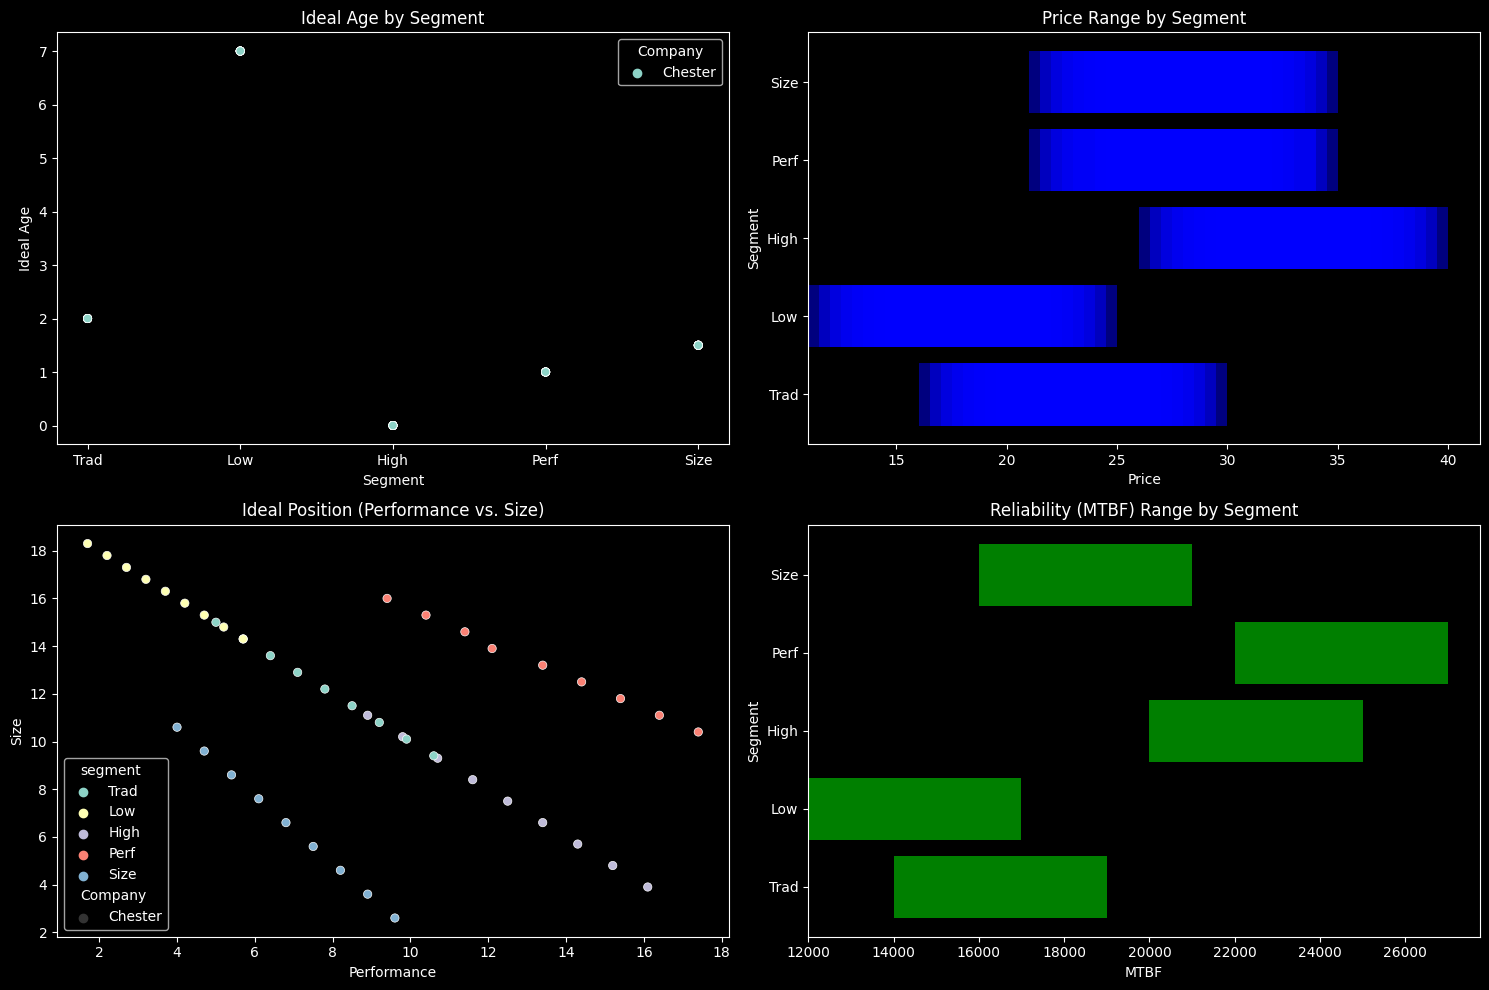

In [27]:
# Preparing data for scatter plots and range bars

data = customer_criteria_df.copy()

# Ideal Age
age_data = data[data["criteria"] == "Ideal Age"].dropna(subset=["Ideal Age"])

# Price
price_data = data[data["criteria"] == "Price"].dropna(
    subset=["Low Price", "High Price"]
)

# Ideal Position (Performance, Size)
position_data = data[data["criteria"] == "Ideal Position"].dropna(
    subset=["Pfmn", "Size"]
)

# Reliability (MTBF)
mtbf_data = data[data["criteria"] == "Reliability (MTBF)"].dropna(
    subset=["MTBF Low", "MTBF High"]
)

# Plotting scatter plots and range bars
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

# Ideal Age Scatter Plot
sns.scatterplot(data=age_data, x="segment", y="Ideal Age", hue="Company", ax=axes[0])
axes[0].set_title("Ideal Age by Segment")
axes[0].set_xlabel("Segment")
axes[0].set_ylabel("Ideal Age")

# Price Range Bar
for _, row in price_data.iterrows():
    axes[1].barh(
        row["segment"],
        left=row["Low Price"],
        width=row["High Price"] - row["Low Price"],
        color="blue",
        alpha=0.5,
    )
axes[1].set_title("Price Range by Segment")
axes[1].set_xlabel("Price")
axes[1].set_ylabel("Segment")

# Ideal Position Scatter Plot
sns.scatterplot(
    data=position_data, x="Pfmn", y="Size", hue="segment", style="Company", ax=axes[2]
)
axes[2].set_title("Ideal Position (Performance vs. Size)")
axes[2].set_xlabel("Performance")
axes[2].set_ylabel("Size")

# MTBF Range Bar
for _, row in mtbf_data.iterrows():
    axes[3].barh(
        row["segment"],
        left=row["MTBF Low"],
        width=row["MTBF High"] - row["MTBF Low"],
        color="green",
        alpha=0.5,
    )
axes[3].set_title("Reliability (MTBF) Range by Segment")
axes[3].set_xlabel("MTBF")
axes[3].set_ylabel("Segment")

plt.tight_layout()
plt.show()

#### Step 2.1.3: Overall Comparison of Criteria Across Segments

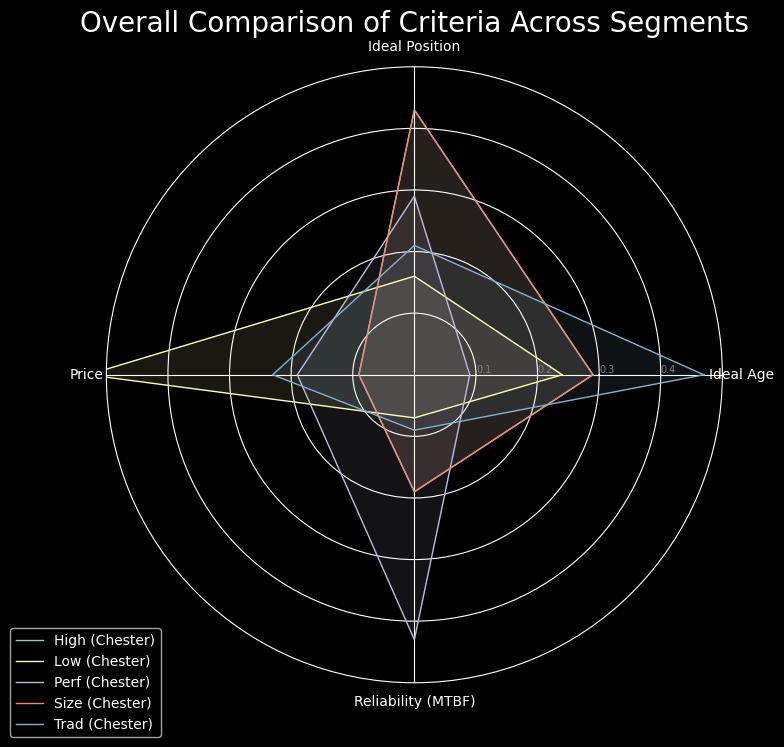

In [23]:
# Aggregating data for radar chart
# Since the data contains multiple entries for the same segment and company, we need to aggregate them
# We'll use the mean of 'Importance' as the value for each criteria

data = customer_criteria_df.copy()

# Creating a pivot table for aggregation
pivot_table = data.pivot_table(
    index=["segment", "Company"],
    columns="criteria",
    values="Importance",
    aggfunc="mean",
)
pivot_table = pivot_table.fillna(0)  # Replacing NaN with 0

# Preparing data for radar chart
labels = pivot_table.columns
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # ensure the plot is circular

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], labels)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.1, 0.2, 0.3, 0.4], ["0.1", "0.2", "0.3", "0.4"], color="grey", size=7)
plt.ylim(0, 0.5)

# Plot each segment's preference profile
for index, row in pivot_table.iterrows():
    values = row.tolist()
    values += values[:1]  # ensure the plot is circular
    ax.plot(
        angles, values, linewidth=1, linestyle="solid", label=f"{index[0]} ({index[1]})"
    )
    ax.fill(angles, values, alpha=0.1)

# Add legend
plt.legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))

plt.title("Overall Comparison of Criteria Across Segments", size=20)
plt.show()

### Step 2.2: Product Performance Analysis

In [28]:
# Create dataframe for 'ProductInfo' sheet
product_info_df = sheets_dict['ProductInfo']

# Display the first 5 rows of product_info_df
print(product_info_df.head())

   round yearEnding  company product segment  unitsSold  Inventory  \
0      0 2023-12-31  Andrews    Able    Trad        999        189   
1      0 2023-12-31  Andrews    Acre     Low       1763         39   
2      0 2023-12-31  Andrews   Agape    Size        314         62   
3      0 2023-12-31  Andrews     Aft    Pfmn        358         78   
4      0 2023-12-31  Andrews    Adam    High        366         40   

  revisionDate  ageDec31   mtbf  pfmn  size  price  materialCost  laborCost  \
0   2020-11-20       3.1  17500   5.5  14.5   28.0         11.59       7.49   
1   2019-05-25       4.6  14000   3.0  17.0   21.0          7.81       7.12   
2   2021-05-25       2.6  19000   4.0  11.0   33.0         13.62       8.57   
3   2021-06-30       2.5  25000   9.4  15.5   33.0         15.87       8.57   
4   2022-04-19       1.7  23000   8.0  12.0   38.0         15.98       8.57   

   contrMargin  2ndShiftOT  automationNR  capacityNR  plantUtiliz  
0         0.29         0.0          

In [29]:
# Create dataframe for 'ProductBySegment' sheet
product_by_segment_df = sheets_dict['ProductBySegment']

# Display the first 5 rows of product_by_segment_df
print(product_by_segment_df.head())

   round yearEnding  company Segment product  marketShare  unitsSoldToSeg  \
0      0 2023-12-31  Andrews    Trad    Able         0.13             961   
1      0 2023-12-31  Baldwin    Trad   Baker         0.13             961   
2      0 2023-12-31  Chester    Trad    Cake         0.13             961   
3      0 2023-12-31    Digby    Trad    Daze         0.13             961   
4      0 2023-12-31     Erie    Trad     Eat         0.13             961   

  revisionDate stockOut  pfmn  size  price   mtbf  ageDec31  promoBudget  \
0   2020-11-20        0   5.5  14.5   28.0  17500       3.1         1000   
1   2020-11-20        0   5.5  14.5   28.0  17500       3.1         1000   
2   2020-11-20        0   5.5  14.5   28.0  17500       3.1         1000   
3   2020-11-20        0   5.5  14.5   28.0  17500       3.1         1000   
4   2020-11-20        0   5.5  14.5   28.0  17500       3.1         1000   

   custAwareness  salesBudget  custaccessibility  custSurveyDec  
0           0.

In [31]:
# View columns of the 'ProductInfo' DataFrame
print(product_info_df.columns)
print(product_info_df.shape)

# View columns of the 'ProductBySegment' DataFrame
print(product_by_segment_df.columns)
print(product_by_segment_df.shape)

Index(['round', 'yearEnding', 'company', 'product', 'segment', 'unitsSold',
       'Inventory', 'revisionDate', 'ageDec31', 'mtbf', 'pfmn', 'size',
       'price', 'materialCost', 'laborCost', 'contrMargin', '2ndShiftOT',
       'automationNR', 'capacityNR', 'plantUtiliz'],
      dtype='object')
(284, 20)
Index(['round', 'yearEnding', 'company', 'Segment', 'product', 'marketShare',
       'unitsSoldToSeg', 'revisionDate', 'stockOut', 'pfmn', 'size', 'price',
       'mtbf', 'ageDec31', 'promoBudget', 'custAwareness', 'salesBudget',
       'custaccessibility', 'custSurveyDec'],
      dtype='object')
(332, 19)


In [35]:
# Rename the 'Segment' column to 'segment' in product_by_segment_df
product_by_segment_df.rename(columns={'Segment': 'segment'}, inplace=True)

In [36]:
# Compare column names of both DataFrames, making list of common columns
common_cols = list(set(product_info_df.columns).intersection(set(product_by_segment_df.columns)))
print(common_cols)

['round', 'price', 'ageDec31', 'segment', 'company', 'yearEnding', 'size', 'pfmn', 'revisionDate', 'product', 'mtbf']


In [37]:
# Compare column names of both DataFrames, making list of columns unique to product_info_df
unique_cols = list(set(product_info_df.columns).difference(set(product_by_segment_df.columns)))
print(unique_cols)

['plantUtiliz', 'contrMargin', 'materialCost', 'laborCost', '2ndShiftOT', 'capacityNR', 'automationNR', 'Inventory', 'unitsSold']


In [63]:
# Merge the two DataFrames
merged_product_df = pd.merge(product_info_df, product_by_segment_df, on=common_cols, how='right')

# View columns of the merged DataFrame
print(merged_product_df.columns)
print(merged_product_df.shape)

Index(['round', 'yearEnding', 'company', 'product', 'segment', 'unitsSold',
       'Inventory', 'revisionDate', 'ageDec31', 'mtbf', 'pfmn', 'size',
       'price', 'materialCost', 'laborCost', 'contrMargin', '2ndShiftOT',
       'automationNR', 'capacityNR', 'plantUtiliz', 'marketShare',
       'unitsSoldToSeg', 'stockOut', 'promoBudget', 'custAwareness',
       'salesBudget', 'custaccessibility', 'custSurveyDec'],
      dtype='object')
(332, 28)


In [64]:
merged_product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   round              332 non-null    int64         
 1   yearEnding         332 non-null    datetime64[ns]
 2   company            332 non-null    object        
 3   product            332 non-null    object        
 4   segment            332 non-null    object        
 5   unitsSold          81 non-null     float64       
 6   Inventory          81 non-null     float64       
 7   revisionDate       332 non-null    datetime64[ns]
 8   ageDec31           332 non-null    float64       
 9   mtbf               332 non-null    int64         
 10  pfmn               332 non-null    float64       
 11  size               332 non-null    float64       
 12  price              332 non-null    float64       
 13  materialCost       81 non-null     float64       
 14  laborCost 

In [66]:
# Convert 'stockOut' column to boolean
merged_product_df['stockOut'] = merged_product_df['stockOut'].astype(bool)

In [67]:
merged_product_df.tail(50)

,round,yearEnding,company,product,segment,unitsSold,Inventory,revisionDate,ageDec31,mtbf,...,capacityNR,plantUtiliz,marketShare,unitsSoldToSeg,stockOut,promoBudget,custAwareness,salesBudget,custaccessibility,custSurveyDec
282,6,2029-12-31,Baldwin,Bold,Perf,NaN,NaN,2029-04-05,1.64,25000,...,NaN,NaN,0.27,1218,True,1250,0.70,656,0.43,12
283,6,2029-12-31,Andrews,Aft,Perf,NaN,NaN,2029-01-10,2.43,27000,...,NaN,NaN,0.26,1188,True,1850,0.85,1815,0.91,13
284,6,2029-12-31,Chester,Coats,Perf,NaN,NaN,2029-04-26,0.68,25000,...,NaN,NaN,0.12,539,True,2000,0.68,1600,0.86,34
285,6,2029-12-31,Digby,Ding,Perf,NaN,NaN,2029-12-13,0.04,27000,...,NaN,NaN,0.01,36,True,1250,0.70,2255,1.00,14
286,6,2029-12-31,Chester,Cure,Size,NaN,NaN,2029-07-04,1.47,16000,...,NaN,NaN,0.33,1238,True,2000,0.76,1400,0.72,26
287,6,2029-12-31,Baldwin,Buddy,Size,NaN,NaN,2029-10-21,1.35,17500,...,NaN,NaN,0.31,1188,True,1100,0.62,656,0.54,10
288,6,2029-12-31,Andrews,Agape,Size,NaN,NaN,2029-01-24,2.24,18000,...,NaN,NaN,0.26,990,True,2000,0.86,1634,0.83,5
289,6,2029-12-31,Digby,Dog,Size,NaN,NaN,2029-06-19,0.53,30000,...,NaN,NaN,0.10,374,False,1500,0.46,2380,0.92,0
290,7,2030-12-31,Chester,Cake,Trad,4703.0,0.0,2030-08-28,1.40,15000,...,3500.0,1.88,0.40,4697,True,2000,0.81,1470,0.77,35
291,7,2030-12-31,Andrews,Able,Trad,NaN,NaN,2031-01-15,3.41,16000,...,NaN,NaN,0.30,3466,True,1900,0.81,1997,1.00,2


In [68]:
# export the merged DataFrame to a CSV file
merged_product_df.to_csv('../../data/processed/merged_product.csv', index=False)